## Exercise 2.5

The first case using sample averages incrementally computed

In [2]:
import numpy as np

def sample_average(k: int, epsilon: float, n_steps: int, constant_step: float = None, info_by_step: bool = True):
    # action value and step initialized at 0
    q_a = np.zeros(k,dtype=float)
    n = np.zeros(k, dtype=float)

    # reward distribution initialization
    q_star = np.ones(k, dtype=float)*np.random.random()*3
    q_delta_mean = 0
    q_delta_stdev = 0.1

    optimal_selections = []

    for i in range(n_steps):
        action =  np.argmax(q_a) if np.random.random() > epsilon else np.random.randint(0,k)
        reward =  q_star[action]

        if constant_step is not None:
            alpha = constant_step
        else:
            n[action] = n[action] + 1
            alpha = 1/n[action]
        # update value function
        q_a[action] = q_a[action] + (alpha)*(reward - q_a[action])
        # shift lever
        q_star = q_star + np.random.normal(q_delta_mean,q_delta_stdev,k)
        # this is for plotting
        was_optimal = int(action == np.argmax(q_star))
        optimal_selections.append(was_optimal)
    return optimal_selections

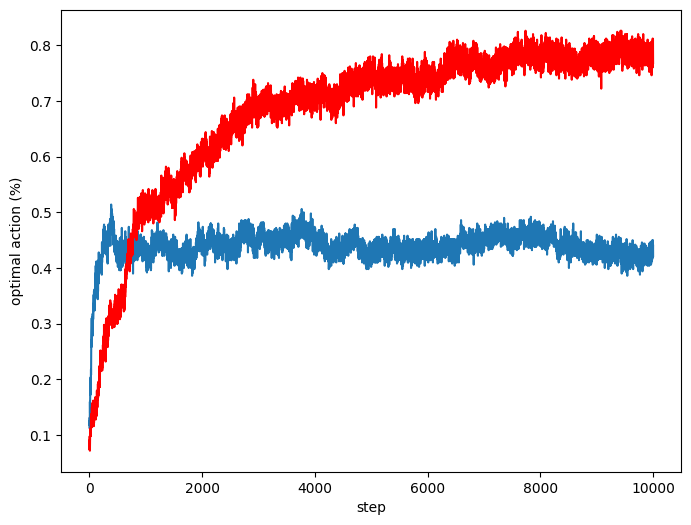

In [4]:
import matplotlib.pyplot as plt

n_runs = 500 # total number of experiments to run

k = 10 # 10 armed bandit
epsilon = 0.1 # e-greedy action selection
n_steps = 10000

sample_average_optimal  = np.zeros(n_steps)
exp_weighted_optimal = np.zeros(n_steps)
for _ in range(n_runs):
    sample_average_optimal += sample_average(k,epsilon,n_steps)
    exp_weighted_optimal += sample_average(k,epsilon,n_steps,constant_step=0.1)


sample_average_optimal /= n_runs
exp_weighted_optimal /= n_runs

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(0,n_steps),sample_average_optimal)
plt.plot(np.arange(0,n_steps),exp_weighted_optimal, color='r')
plt.xlabel('step')
plt.ylabel('optimal action (%)')
plt.show()

## Exercise 2.11

Just another for-loop for epsilon. Average is taken from the last 100.000 steps

In [25]:
from tqdm import tqdm
import matplotlib.pyplot as plt

n_runs = 500 # total number of experiments to run

k = 10 # 10 armed bandit
epsilon_space = [1/128 * 2**i for i in range(5)]
n_steps = 200000
steps_considered = 100000

sample_average_param_study = []
exp_weighted_param_study = []

# loop in parameter space
for e in epsilon_space:
    print("epsilon: ",e)
    sample_average_optimal  = 0
    exp_weighted_optimal = 0
    for _ in tqdm(range(n_runs)):
        sample_average_optimal += np.mean(sample_average(k,e,n_steps))
        exp_weighted_optimal += np.mean(sample_average(k,e,n_steps,constant_step=0.1))
    # average across runs
    sample_average_optimal /= n_runs
    exp_weighted_optimal /= n_runs
    # experiment for this parameter value only considers last 100000 steps
    sample_average_param_study.append(np.mean(sample_average_optimal[-steps_considered:]))
    exp_weighted_param_study.append(np.mean(exp_weighted_optimal[-steps_considered:]))

epsilon:  0.0078125


  2%|▏         | 10/500 [00:18<15:14,  1.87s/it]


KeyboardInterrupt: 

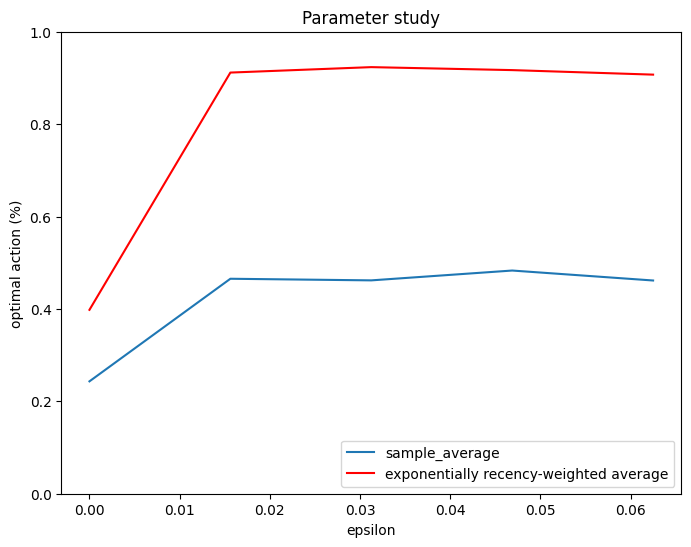

In [21]:
fig = plt.figure(figsize=(8,6))
plt.plot(epsilon_space,sample_average_param_study, label = 'sample_average')
plt.plot(epsilon_space,exp_weighted_param_study, color='r',label='exponentially recency-weighted average')
plt.xlabel('epsilon')
plt.ylabel('optimal action (%)')
plt.ylim((0,1))
plt.legend(loc="lower right")
plt.title("Parameter study")
plt.show()